# group articles by authors

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
import pandas as pd
from beakerx import *

In [34]:
import bibigraph as big

In [35]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
biblio = big.Bibliography()

datafile = 'data/citing_Nye1953_journals.bib'
biblio.load( datafile )

930 articles added


In [37]:
biblio.articles[4]

A unified framework for polycr... (2018) International Journal of Plasticity

In [38]:
import networkx as nx

In [39]:
# Build a distance matrix between each article
# the distance function is the number of authors in both article
# - create a networkx Graph -

distanceByCoauthors = nx.Graph()
for i, articleA in enumerate( biblio.articles ):
    for j in range( i+1, len(biblio.articles) ):
        articleB = biblio.articles[j]

        authorsA = set( articleA.authors )
        authorsB = set( articleB.authors )

        nCommun = len( authorsA & authorsB ) # intersection
        if nCommun>1:
            ebunch = (articleA.key, articleB.key, {'weight': nCommun})
            distanceByCoauthors.add_edges_from([ebunch ])
            
cc = nx.connected_components(distanceByCoauthors)
groupByAuthors = [c for c in sorted(cc, key=len, reverse=True)]

In [40]:
print('Nombre de groupes: %i' % len(groupByAuthors))
print('Nombre de publications dans les 10 plus grands groupes:')
print( [len(c) for c in groupByAuthors[:10]] )
print( 'Nombre de duo: %i' % len( [c for c in groupByAuthors if len(c)==2] ) )
print( 'Nombre de publications en grps: %i' % sum( [len(c) for c in groupByAuthors] ) )

Nombre de groupes: 109
Nombre de publications dans les 10 plus grands groupes:
[45, 44, 35, 22, 20, 9, 8, 8, 8, 8]
Nombre de duo: 50
Nombre de publications en grps: 487


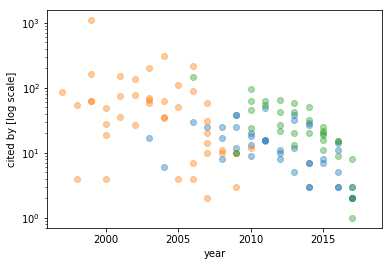

In [41]:
def getYearCitedBy(key):
    
    article = biblio.getArticleFromKey(key)
    return (article.year, article.nbrCitation)

for groupId in range(len(groupByAuthors[:3])):
    year, CitedBy = zip( *[ getYearCitedBy(key) for key in groupByAuthors[groupId]] )

    plt.semilogy( year, CitedBy, 'o', alpha=0.4 )
    
    
plt.xlabel('year');plt.ylabel('cited by [log scale]');

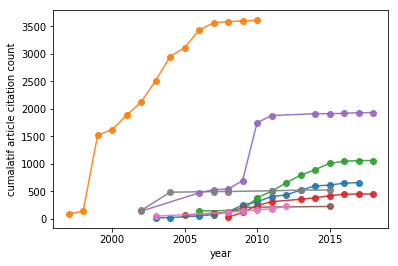

In [42]:
def getYearCount(key):
    
    article = biblio.getArticleFromKey(key)
    return (article.year, article.nbrCitation)

groupId = 8

for groupId in range(len(groupByAuthors[:8])):
    yearsCitedBy = [ getYearCount(key) for key in groupByAuthors[groupId]]

    years, citedBy = zip(*yearsCitedBy)
    year_span = sorted( set(years) )

    CitedByCount = [ sum( [ c for y, c in yearsCitedBy if y==year] )  for year in year_span  ]
    plt.plot( year_span, np.cumsum(CitedByCount), 'o-', alpha=0.9 )
    
    
plt.xlabel('year');plt.ylabel('cumalatif article citation count');

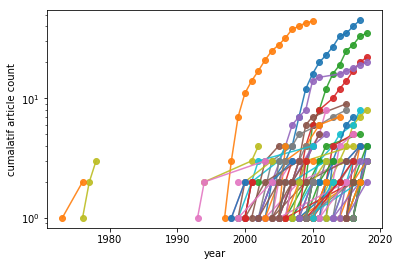

In [43]:
def getYearCount(key):
    
    article = biblio.getArticleFromKey(key)
    return (article.year, article.nbrCitation)

groupId = 0

for groupId in range(len(groupByAuthors[:])):
    years = [ biblio.getArticleFromKey(key).year for key in groupByAuthors[groupId]]
    year_span = sorted( set(years) )
    count = [ years.count(y) for y in year_span  ]
    plt.semilogy( year_span, np.cumsum(count), 'o-', alpha=0.9 )
    
    
plt.xlabel('year');plt.ylabel('cumalatif article count');

In [44]:
def articleToDict( article ):

    dico = {}
    dico['title'] = article.title
    dico['nbrCitation'] = article.nbrCitation
    dico['journal'] = article.journal
    dico['year'] = article.year
    dico['authors'] = '; '.join(article.authors)
    return dico

In [45]:
groupId = 0
dfGrp = pd.DataFrame.from_records( [articleToDict(biblio.getArticleFromKey(key)) for key in groupByAuthors[groupId]] )
dfGrp

In [46]:
def addOneDico( dico, key ):
    if key in dico:
        dico[key] += 1
    else:
        dico[key] = 1

In [50]:
groupId = 3

affiCount = {}
for key in groupByAuthors[groupId]:
    article = biblio.getArticleFromKey(key)
    for aff in article.affiliation:
        aff = parseAffiliation( aff )
        addOneDico( affiCount, aff )
        
sorted( affiCount.items(), key=lambda x:x[1], reverse=True)

[(('UT', 'United States'), 10),
 (('UT 84602', 'United States'), 9),
 (('NY 10027', 'United States'), 4),
 (('NY', 'United States'), 3),
 (('OH 43210', 'United States'), 2),
 (('MI', 'United States'), 2),
 (('VA', 'United States'), 2),
 (('OH', 'United States'), 2),
 (('Gyeongbuk 790-784', 'South Korea'), 1),
 (('NH', 'United States'), 1),
 (('MI 48824', 'United States'), 1),
 (('VA 23662', 'United States'), 1),
 (('MA', 'United States'), 1),
 (('UT 84601', 'United States'), 1),
 (('NJ', 'United States'), 1),
 (('Gyeongnam 641-831', 'South Korea'), 1),
 (('PA', 'United States'), 1),
 (('GA', 'United States'), 1),
 (('NM', 'United States'), 1),
 (('Busan 609-735', 'South Korea'), 1),
 (('BC V6T 1Z4', 'Canada'), 1),
 (('SE-100 44 Stockholm', 'Sweden'), 1)]

### Authors and affiliation

In [48]:
groupId = 1
for a in groupByAuthors[groupId]: 
    article =  biblio.getArticleFromKey(a)
    print('; '.join( sorted(article.authors ) ))

Gao, H.; Huang, Y.; Nix, W.D.
Huang, Y.; Hwang, K.C.; Shi, M.X.
Gao, H.; Huang, Y.; Hwang, K.C.; Shi, M.X.
Huang, Y.; Hwang, K.C.; Li, M.; Nix, W.D.; Qu, S.; Saha, R.; Zhang, F.
Gao, H.; Huang, Y.; Hwang, K.C.; Song, J.
Huang, Y.; Hwang, K.C.; Liu, C.; Wu, P.D.; Yun, G.
Huang, Y.; Hwang, K.C.; Jiang, H.; Li, M.; Shi, M.
Guo, T.F.; Huang, Y.; Hwang, K.-C.; Zhang, L.
Gao, H.; Huang, Y.; Hwang, K.C.; Jiang, H.
Feng, G.; Huang, Y.; Hwang, K.C.; Nix, W.D.; Pharr, G.M.; Zhang, F.
Gao, H.; Huang, Y.
Gao, H.; Huang, Y.; Hwang, K.C.; Li, M.; Qu, S.
Gao, H.; Huang, Y.; Shi, M.X.
Gao, H.; Huang, Y.; Hwang, K.C.; Nix, W.D.; Qiu, X.
Huang, Y.; Hwang, K.C.; Jiang, H.; Nix, W.D.; Qu, S.; Zhang, F.
Huang, Y.; Hwang, K.C.; Liu, C.; Qu, S.; Zhang, F.
Chen, J.Y.; Guo, T.F.; Huang, Y.; Hwang, K.C.; Zhang, L.
Chen, J.Y.; Huang, Y.; Hutchinson, J.W.; Hwang, K.C.; Wei, Y.
Huang, Y.; Hwang, K.C.; Wu, P.D.; Yun, G.
Huang, Y.; Hwang, K.C.; Qu, S.; Siegmund, T.; Wu, P.D.; Zhang, F.
Huang, Y.; Li, M.; Xue, Z.
Che

In [59]:
groupId = 6
for a in groupByAuthors[groupId]:
    print('; '.join( biblio.getArticleFromKey(a).authors ))
    print( [ parseAffiliation( aff ) for aff in  biblio.getArticleFromKey(a).affiliation ] )

Hochrainer, T.; Zaiser, M.; Gumbsch, P.
[('76131 Karlsruhe', 'Germany'), ('Edinburgh EH93JL', 'United Kingdom'), ('79108 Freiburg', 'Germany')]
Sandfeld, S.; Hochrainer, T.; Zaiser, M.; Gumbsch, P.
[('76131 Karlsruhe', 'Germany'), ('FL 32310', 'United States'), ('Edinburgh EH93JL', 'United Kingdom'), ('79108 Freiburg', 'Germany')]
Wu, R.; Zaiser, M.; Sandfeld, S.
[('Fürth', 'Germany'), ('Freiberg', 'Germany')]
Schulz, K.; Dickel, D.; Schmitt, S.; Sandfeld, S.; Weygand, D.; Gumbsch, P.
[('76131 Karlsruhe', 'Germany'), ('90762 Fürth', 'Germany'), ('79108 Freiburg', 'Germany')]
Monavari, M.; Sandfeld, S.; Zaiser, M.
[('Fürth', 'Germany')]
Sandfeld, S.; Hochrainer, T.; Gumbsch, P.; Zaiser, M.
[('76131 Karlsruhe', 'Germany'), ('79108 Freiburg', 'Germany'), ('EH9 3JL', 'United Kingdom')]
Schulz, K.; Sudmanns, M.; Gumbsch, P.
[('Karlsruhe', 'Germany'), ('Freiburg', 'Germany')]
Sandfeld, S.; Monavari, M.; Zaiser, M.
[('90762 Fürth', 'Germany')]


In [191]:
distanceByCoauthors.number_of_nodes()

159

In [23]:
def parseAffiliation( aff ):
    ''' take the affiliation string (already splited)
    '''
    aff = aff.split(',')
    country = aff[-1].strip()
    city = aff[-2].strip()
    
    return city, country